<a href="https://colab.research.google.com/github/RofiqAulia/Machine-Learning/blob/main/Tugas_Klasifikasi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()

Saving voice.csv to voice (1).csv


1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split # Import the train_test_split function

# Read the CSV file
df = pd.read_csv('voice.csv', encoding='latin-1')  # Specify encoding if needed

# Display the first few rows of the dataset
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
# Cek informasi umum dataset
print(df.info())

# Cek distribusi target label
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [8]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)  # Fitur
y = df['label']  # Label


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode labels (female=0, male=1)
le = LabelEncoder()
y = le.fit_transform(y)



In [10]:
# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [13]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Import the SVC class from sklearn.svm
from sklearn.svm import SVC

# Buat model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Latih model dengan data training
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [17]:
# Import the SVC class from sklearn.svm
from sklearn.svm import SVC

# Buat model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Latih model dengan data training
svm_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = svm_model.predict(X_test)

# Import the confusion_matrix and classification_report functions
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Laporan Klasifikasi
print(classification_report(y_test, y_pred))



[[437  15]
 [ 13 486]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       452
           1       0.97      0.97      0.97       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



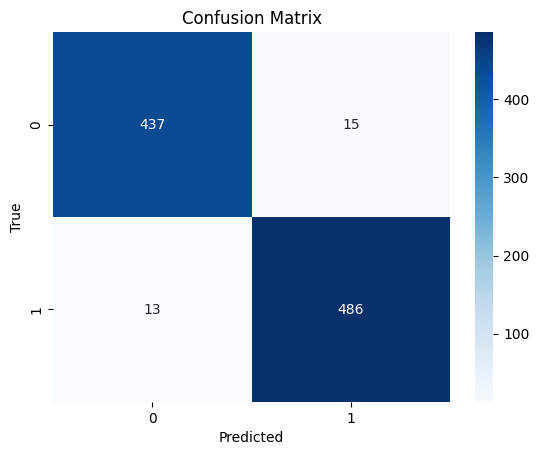

In [18]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# SVM dengan kernel RBF
svm_model_rbf = SVC(kernel='rbf', C=1)
svm_model_rbf.fit(X_train, y_train)

# Evaluasi dengan RBF kernel
y_pred_rbf = svm_model_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       452
           1       0.99      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



# Tugas No.2



2.Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

Fitur CountVectorizer dengan mengaktifkan stop_words

Evaluasi hasilnya

In [20]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


1. Import Library dan Baca Dataset

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split # Import the train_test_split function
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Read the CSV file
df = pd.read_csv('spam.csv', encoding='latin-1')  # Specify encoding if needed

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


2. Preprocessing Data

In [22]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_2.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

In [24]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('SMS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SMS'].value_counts()
    for x_label, grp in _df_5.groupby('Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Labels')
_ = plt.ylabel('SMS')

3.	Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1.	Menggunakan data spam.csv
2.	Fitur TF-IDF dengan mengaktifkan stop_words
3.	Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.


In [25]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

Memuat data

In [27]:
# Memuat dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Preprocessing
# Menghapus kolom yang tidak diperlukan
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [28]:
# Mengonversi label ke biner (1 untuk spam, 0 untuk ham)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

In [29]:
# Memisahkan fitur dan label
X = data['text']
y = data['label']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Menggunakan TF-IDF dengan stop_words diaktifkan
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [31]:
# Membangun model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
# Memprediksi hasil pada data testing
y_pred = model.predict(X_test_tfidf)

Evaluasi Model

In [33]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghasilkan laporan klasifikasi (precision, recall, f1-score)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print('Laporan Klasifikasi:')
print(report)

Akurasi: 0.9668161434977578
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Tugas Klasifikasi 2
